# TRIE: Árboles de prefijos


Los TRIE es una estructura de datos en forma de árbol que se usa para almacenar y buscar cadenas de texto de manera eficiente. Su principal ventaja es que permite búsquedas rápidas en grandes volúmenes de palabras.
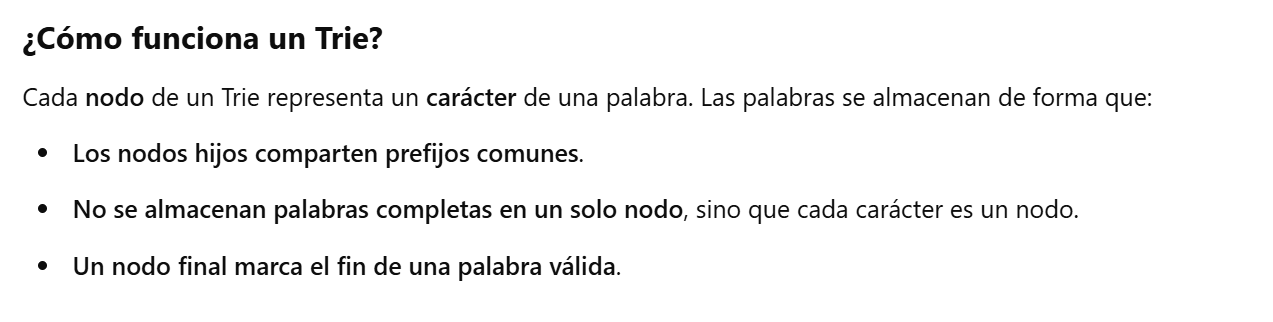
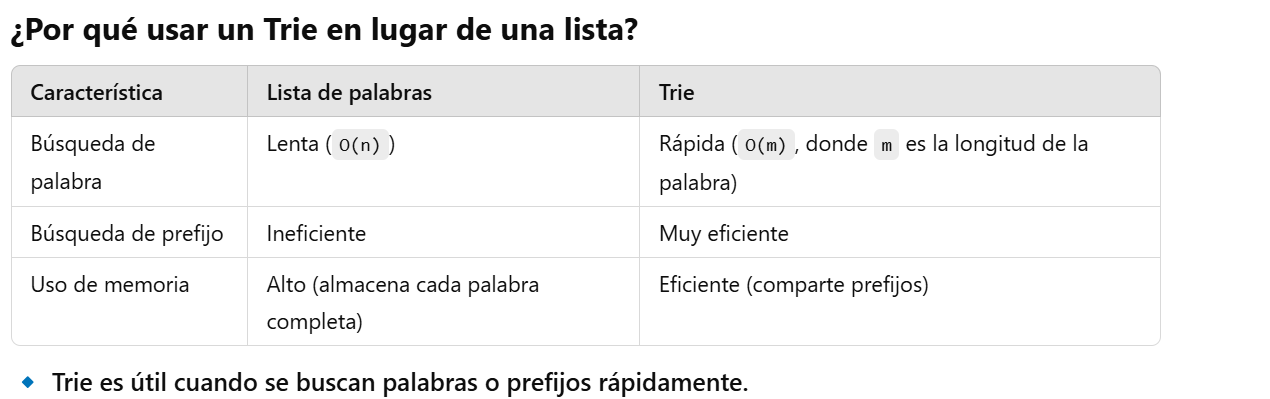
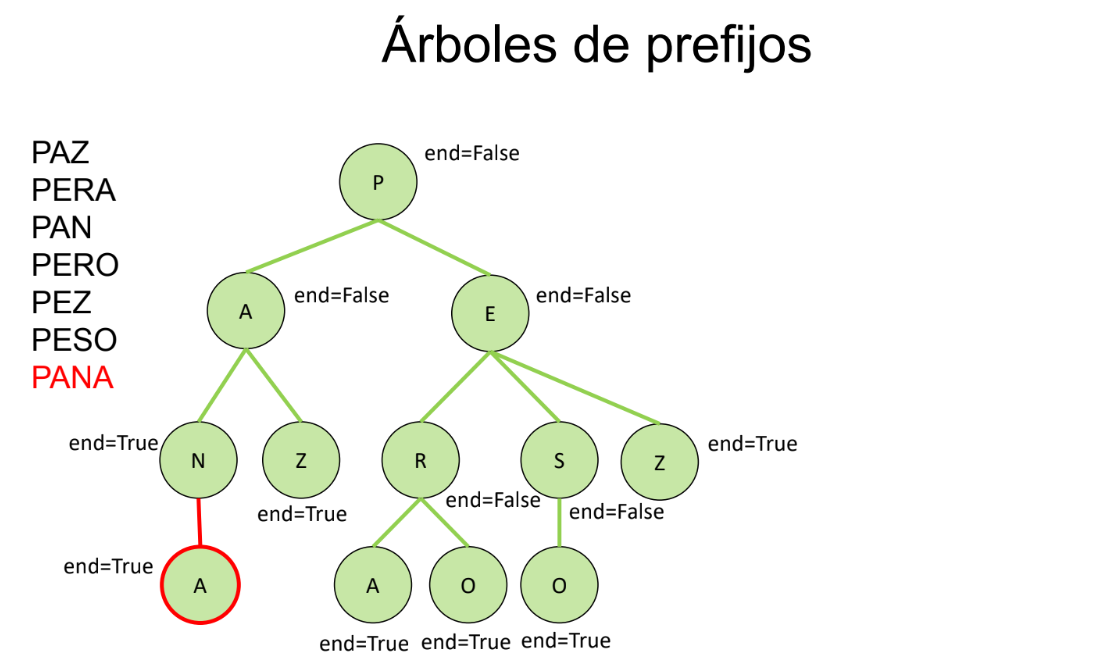
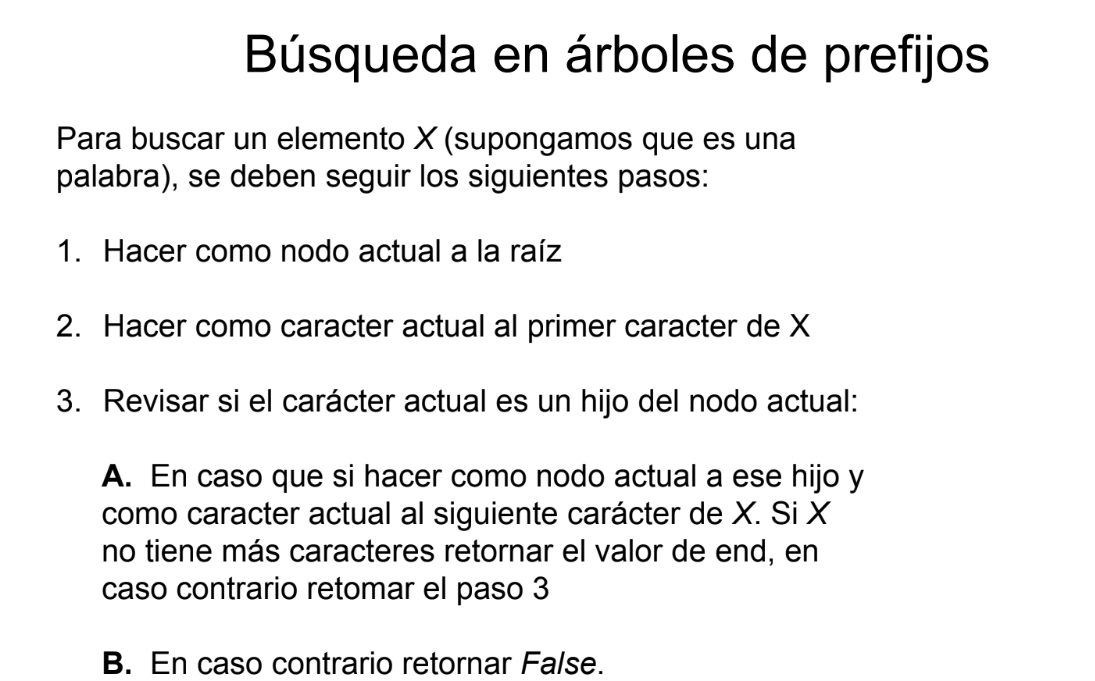
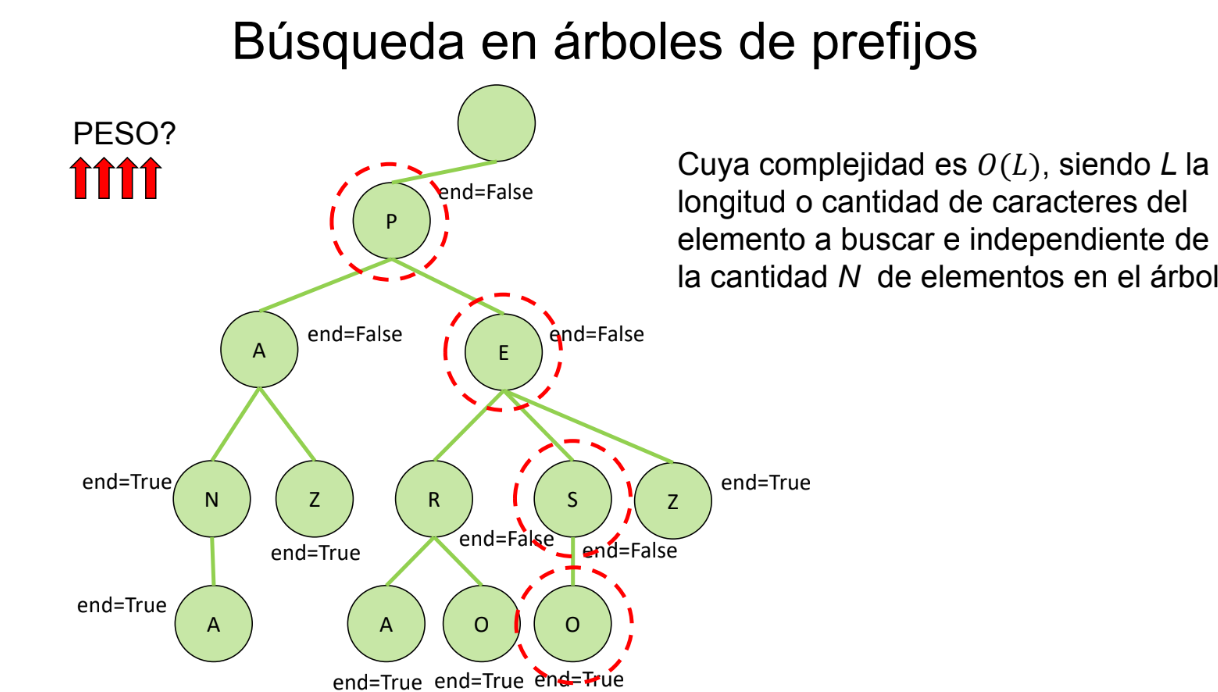

## Ejercicio 1

In [ ]:
class TrieNode:
    def __init__(self):
        self.children = {}
        self.is_end = False

class Trie:
    def __init__(self):
        self.root = TrieNode()
    
    def insert_and_check(self, word):
        """
        Inserta una palabra en el trie y verifica si es prefijo de otra
        o si tiene un prefijo que es otra palabra
        """
        node = self.root
        
        # Verificar si esta palabra es prefijo de una existente
        for char in word:
            if char not in node.children:
                node.children[char] = TrieNode()
            node = node.children[char]
            if node.is_end:  # Si encontramos una palabra más corta
                return False
        
        # Marcar fin de palabra
        node.is_end = True
        
        # Verificar si esta palabra es prefijo de otras más largas
        return not self._has_children(node)
    
    def _has_children(self, node):
        """Verifica si un nodo tiene hijos"""
        return len(node.children) > 0

def verify_dna_sequences():
    """Procesa los casos de prueba"""
    while True:
        # Leer número de especies
        E = int(input())
        if E == 0:
            break
            
        # Crear nuevo trie para este caso
        trie = Trie()
        hypothesis_valid = True
        
        # Procesar cada secuencia de ADN
        for _ in range(E):
            dna = input().strip()
            if not trie.insert_and_check(dna):
                hypothesis_valid = False
                
        # Imprimir resultado
        print("TRUE" if hypothesis_valid else "FALSE")


verify_dna_sequences()

## Ejercicio 2


In [ ]:
class TrieNode:
    def __init__(self):
        self.children = {}
        self.is_end = False
        self.count_prefix = 0  # Contador de palabras que usan este nodo

class Trie:
    def __init__(self):
        self.root = TrieNode()
    
    def insert(self, word):
        """Inserta una palabra en el trie"""
        node = self.root
        for char in word:
            if char not in node.children:
                node.children[char] = TrieNode()
            node = node.children[char]
            node.count_prefix += 1  # Incrementa contador de prefijos
        node.is_end = True
    
    def count_words_with_prefix(self, prefix):
        """Cuenta palabras que comienzan con el prefijo dado"""
        node = self.root
        for char in prefix:
            if char not in node.children:
                return 0
            node = node.children[char]
        return node.count_prefix

def solve_word_game():
    # Leer número de palabras en el léxico
    N = int(input())
    
    # Crear y poblar el trie
    trie = Trie()
    for _ in range(N):
        word = input().strip()
        trie.insert(word)
    
    # Leer número de turnos
    T = int(input())
    
    # Procesar cada turno
    for _ in range(T):
        prefix = input().strip()
        result = trie.count_words_with_prefix(prefix)
        print(result)


solve_word_game()

## Ejercicio 3

In [ ]:
import sys

for line in sys.stdin:
    T = int(line.strip())
    if T == 0:
        break
    phones = [input().strip() for _ in range(T)]
    if not phones:
        print('-')
        continue
    current_lcp = phones[0]
    for phone in phones[1:]:
        min_len = min(len(current_lcp), len(phone))
        i = 0
        while i < min_len and current_lcp[i] == phone[i]:
            i += 1
        current_lcp = current_lcp[:i]
        if not current_lcp:
            break
    print(current_lcp if current_lcp else '-')

## Ejercicio 4

In [ ]:
class TrieNode:
    def __init__(self):
        self.children = {}
        self.count = 0  # Cantidad de palabras que pasan por este nodo

class Trie:
    def __init__(self):
        self.root = TrieNode()
    
    def insert(self, word):
        """Inserta un nombre de asteroide en el trie"""
        node = self.root
        for char in word:
            if char not in node.children:
                node.children[char] = TrieNode()
            node = node.children[char]
            node.count += 1
    
    def find_shortest_prefix_length(self, word):
        """Encuentra la longitud del prefijo más corto y único"""
        node = self.root
        prefix_len = 0
        
        for char in word:
            node = node.children[char]
            prefix_len += 1
            
            # Si solo hay un nombre que pasa por este nodo,
            # hemos encontrado un prefijo único
            if node.count == 1:
                return prefix_len
        
        # Si llegamos aquí, el nombre completo es el prefijo más corto
        return len(word)

def main():
    while True:
        # Leer cantidad de asteroides
        A = int(input())
        if A == 0:
            break
            
        # Crear trie y lista de nombres
        trie = Trie()
        asteroid_names = []
        
        # Leer nombres de asteroides
        for _ in range(A):
            name = input().strip()
            asteroid_names.append(name)
            trie.insert(name)
        
        # Calcular suma de longitudes de prefijos
        total_chars = 0
        for name in asteroid_names:
            total_chars += trie.find_shortest_prefix_length(name)
        
        # Imprimir resultado
        print(total_chars)


main()

## Ejercicio 5

In [ ]:
from collections import defaultdict

class StringSet:
    def __init__(self):
        self.strings = set()  # Conjunto de strings
        self.prefix_count = defaultdict(int)  # Contador de prefijos
    
    def add_string(self, s):
        """Agrega un string y actualiza contadores de prefijos"""
        if s not in self.strings:
            self.strings.add(s)
            # Actualizar contadores para cada prefijo posible
            for i in range(1, len(s) + 1):
                prefix = s[:i]
                self.prefix_count[prefix] += 1
    
    def remove_string(self, s):
        """Elimina un string y actualiza contadores de prefijos"""
        if s in self.strings:
            self.strings.remove(s)
            # Actualizar contadores para cada prefijo
            for i in range(1, len(s) + 1):
                prefix = s[:i]
                self.prefix_count[prefix] -= 1
                if self.prefix_count[prefix] == 0:
                    del self.prefix_count[prefix]
    
    def check_prefix(self, k, h):
        """Verifica si hay al menos k strings con prefijo común de longitud h"""
        # Verificar cada string existente
        for s in self.strings:
            if len(s) >= h:
                prefix = s[:h]
                if self.prefix_count[prefix] >= k:
                    return True
        return False

def main():
    # Crear conjunto de strings
    string_set = StringSet()
    
    # Leer número de operaciones
    P = int(input())
    
    # Procesar cada operación
    for _ in range(P):
        op, *args = input().split()
        op = int(op)
        
        if op == 1:  # Agregar
            string_set.add_string(args[0])
        elif op == 2:  # Eliminar
            string_set.remove_string(args[0])
        else:  # Consultar
            k, h = map(int, args)
            print("SI" if string_set.check_prefix(k, h) else "NO")
        


main()

ValueError: invalid literal for int() with base 10: ''

## Ejercicio 6

In [ ]:
import re
from collections import Counter

def solve_autocomplete():
    # Leer número de líneas del texto de referencia
    L = int(input())
    
    # Leer y concatenar todas las líneas del texto
    text = ""
    for _ in range(L):
        text += input() + " "
    
    # Extraer palabras usando expresiones regulares (solo letras)
    words = re.findall(r'[a-zA-Z]+', text.lower())
    
    # Contar frecuencia de cada palabra
    word_counts = Counter(words)
    
    # Leer número de consultas
    C = int(input())
    
    # Procesar cada consulta
    for _ in range(C):
        prefix = input().lower()
        
        # Encontrar palabras que empiezan con el prefijo dado
        matches = [(word, count) for word, count in word_counts.items() 
                  if word.startswith(prefix)]
        
        # Ordenar por frecuencia (descendente) y alfabéticamente en caso de empate
        matches.sort(key=lambda x: (-x[1], x[0]))
        
        # Mostrar resultados
        if matches:
            print(" ".join(word for word, _ in matches))
        else:
            print("-")

solve_autocomplete()